# Introduction
The bike has 20 gears which are the cetagories/labels of the classification. Fetaures are cadence and speed with data of the trainings app. We train our model with data sets of all 20 gears (means 20 tcx files loaded with labeled oberservations).


# Analyze
Question: Which classification algorithm classifies the features cadence and speed good enough to classify a observation to its selected gear. Optimum is to find out with one observation and to have a high probability for only _one_ label?

_Train data (app data):
* X of app data set -> [cadence, speed]
* Y -> [selected gear]

## Pre processing


In [19]:
import pandas as pd

from src.tcx import Tcx, COLUMN_NAME_SPEED, COLUMN_NAME_WATTS, COLUMN_NAME_CADENCE
from src.test_data import TrainDataSet

tcx_app_gear7: Tcx = Tcx.read_tcx(file_path='test/tcx/cadence_1612535177298-gear7.tcx')
tcx_app_gear20: Tcx = Tcx.read_tcx(file_path='test/tcx/cadence_1612535671464-gear20.tcx')
tcx_tacx_gear7: Tcx = Tcx.read_tcx(file_path='test/tcx/tacx-activity_6225123072-gear7-resistance3.tcx')
tcx_tacx_gear20: Tcx = Tcx.read_tcx(file_path='test/tcx/tacx-activity_6225123072-gear7-resistance3.tcx')

# generate test data
dts_gear7: TrainDataSet = TrainDataSet(tcx_app_gear7)
dts_gear20: TrainDataSet = TrainDataSet(tcx_app_gear20)
dts_tacx_gear7: TrainDataSet = TrainDataSet(tcx_tacx_gear7)

## Linear regression
To find out we create a linear model from the tacx data with differetn features and calculate a score for each tacx cadence value to see whether the model predicts the velocity good enough.

### Cadence
_X_ = [cadence], _y_ = power

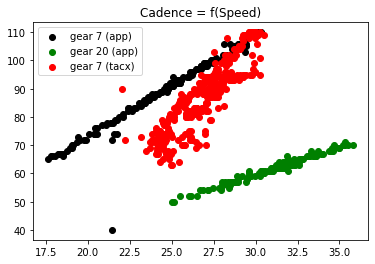

In [20]:
from functools import reduce

from sklearn.model_selection import train_test_split
from sklearn.linear_model._base import LinearModel

import matplotlib.pyplot as plt



def plot(X_train: pd.DataFrame, y_train: pd.Series, point_color='black', legend_label='unknown') -> None:
    # Plot X_train -> y_train
    plt.scatter(X_train, y_train,  color=point_color, label=legend_label)
    plt.title("{} = f({})".format(y_train.name, reduce(lambda l, r: "{}, {}".format(l, r), X_train.columns)))
    plt.xticks()
    plt.yticks()
    plt.legend()

# === gear 7
X, y = dts_gear7.cadence_to_speed()
plot(pd.DataFrame(y), X.iloc[:,0], legend_label='gear 7 (app)')
X, y = dts_gear20.cadence_to_speed()
plot(pd.DataFrame(y), X.iloc[:,0], point_color='green', legend_label='gear 20 (app)')

X, y = dts_tacx_gear7.cadence_to_speed()
plot(pd.DataFrame(y), X.iloc[:,0], point_color='red', legend_label='gear 7 (tacx)')

plt.show()
plt.close()

# Find X(cad/speed) in tacx in cluster of X(cad/speed) in app data

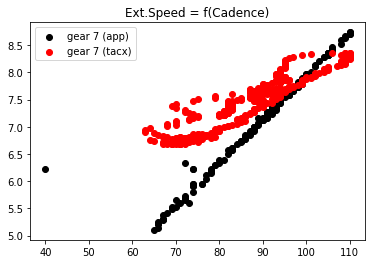

In [21]:
X, y = dts_gear7.cadence_to_externalspeed()
plot(X, y, point_color='black', legend_label='gear 7 (app)')
X, y = dts_tacx_gear7.cadence_to_externalspeed()
plot(X, y, point_color='red', legend_label='gear 7 (tacx)')

In the dataset of tacx are